# Human Resources
El propósito es encontrar los motivos por el cual un empleado deja la compañia, o porque se quiere quedar.  Cómo podemos motivarlos, and cual es el costo asociado con la rotación del personal.

## Paso 1: Importar Librerias

In [ ]:
## Paso 1: Importar las librerias

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format='{:,.2f}'.format

## Paso 2: Importar el dataset

In [5]:
data = pd.read_csv('Human_Resources.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,...,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,...,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,...,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,...,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,...,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Paso 3: Visualización del dataset

In [10]:
# Reeemplazaremos 'Attrition', 'Overtime','Over18' de booleanos a integers
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x:1 if x=='Y' else 0)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,...,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,...,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,...,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,...,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,...,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
# Hallando la cantidad de bins a través de la regla de Sturges:
n = len(data) #al ser par n, se redondea hacia arriba
k = int(np.ceil(1+np.log2(n)))
k

12

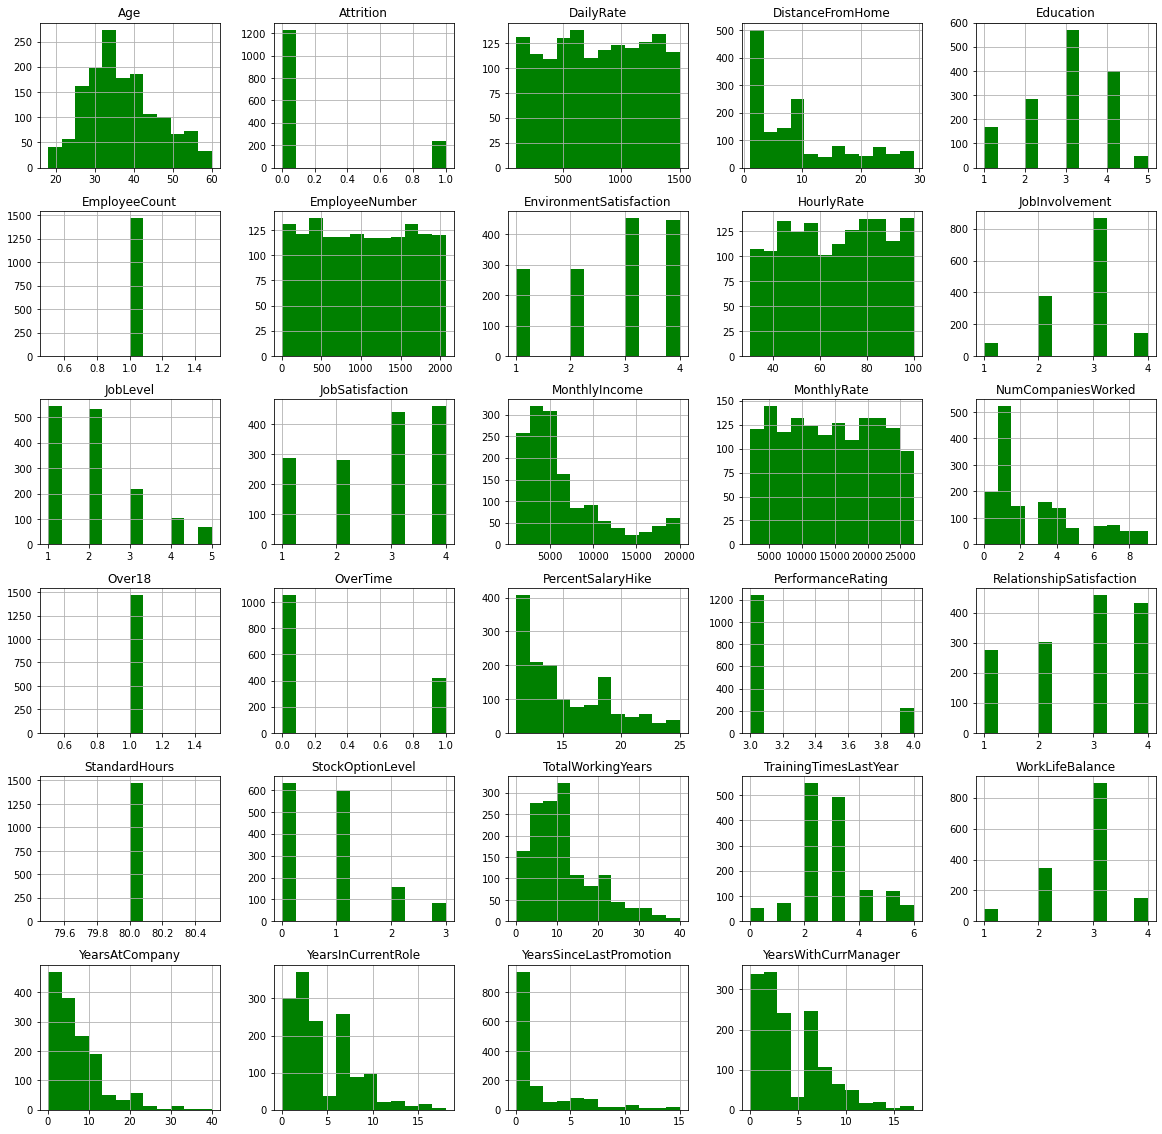

In [17]:
data.hist(bins=k, figsize=(20,20), color='g');

In [19]:
# Eliminaremos colummnas que no agregan valor
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1, inplace=True)

In [20]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,...,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,...,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,...,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,...,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,...,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [22]:
# Cuántos empleados dejaron la compañia
left_df = data[data['Attrition'] ==1 ] 
stayed_df = data[data['Attrition']== 0]

In [28]:
print('Total= ', len(data))
print('Number of employees who left= ', len(left_df))
print('% of employees who left= ', len(left_df)/len(data)*100,'%')

print('Number of employees who stayed= ', len(stayed_df))
print('% of employees who stayed= ', len(stayed_df)/len(data)*100,'%')

Total=  1470
Number of employees who left=  237
% of employees who left=  16.122448979591837 %
Number of employees who stayed=  1233
% of employees who stayed=  83.87755102040816 %


In [29]:
# Características de las personas que se fueron:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00
mean,33.61,1.00,750.36,10.63,2.84,2.46,65.57,2.52,1.64,2.47,"4,787.09","14,559.31",2.94,0.54,15.10,3.16,2.60,0.53,8.24,2.62,2.66,5.13,2.90,1.95,2.85
std,9.69,0.00,401.90,8.45,1.01,1.17,20.10,0.77,0.94,1.12,"3,640.21","7,208.15",2.68,0.50,3.77,0.36,1.13,0.86,7.17,1.25,0.82,5.95,3.17,3.15,3.14
min,18.00,1.00,103.00,1.00,1.00,1.00,31.00,1.00,1.00,1.00,"1,009.00","2,326.00",0.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,28.00,1.00,408.00,3.00,2.00,1.00,50.00,2.00,1.00,1.00,"2,373.00","8,870.00",1.00,0.00,12.00,3.00,2.00,0.00,3.00,2.00,2.00,1.00,0.00,0.00,0.00
50%,32.00,1.00,699.00,9.00,3.00,3.00,66.00,3.00,1.00,3.00,"3,202.00","14,618.00",1.00,1.00,14.00,3.00,3.00,0.00,7.00,2.00,3.00,3.00,2.00,1.00,2.00
75%,39.00,1.00,"1,092.00",17.00,4.00,4.00,84.00,3.00,2.00,3.00,"5,916.00","21,081.00",5.00,1.00,17.00,3.00,4.00,1.00,10.00,3.00,3.00,7.00,4.00,2.00,5.00
max,58.00,1.00,"1,496.00",29.00,5.00,4.00,100.00,4.00,5.00,4.00,"19,859.00","26,999.00",9.00,1.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,15.00,15.00,14.00


In [31]:
# Características de las personas que permanecieron en el trabajo
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00","1,233.00"
mean,37.56,0.00,812.50,8.92,2.93,2.77,65.95,2.77,2.15,2.78,"6,832.74","14,265.78",2.65,0.23,15.23,3.15,2.73,0.85,11.86,2.83,2.78,7.37,4.48,2.23,4.37
std,8.89,0.00,403.21,8.01,1.03,1.07,20.38,0.69,1.12,1.09,"4,818.21","7,102.26",2.46,0.42,3.64,0.36,1.07,0.84,7.76,1.29,0.68,6.10,3.65,3.23,3.59
min,18.00,0.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,051.00","2,094.00",0.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,31.00,0.00,477.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,"3,211.00","7,973.00",1.00,0.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,817.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,"5,204.00","14,120.00",2.00,0.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,6.00,3.00,1.00,3.00
75%,43.00,0.00,"1,176.00",13.00,4.00,4.00,83.00,3.00,3.00,4.00,"8,834.00","20,364.00",4.00,0.00,18.00,3.00,4.00,1.00,16.00,3.00,3.00,10.00,7.00,3.00,7.00
max,60.00,0.00,"1,499.00",29.00,5.00,4.00,100.00,4.00,5.00,4.00,"19,999.00","26,997.00",9.00,1.00,25.00,4.00,4.00,3.00,38.00,6.00,4.00,37.00,18.00,15.00,17.00


#### Observaciones:
- 'age':El promedio de la edad de los empleados que permanecieron en el trabajo es mayor que de las que se fueron.
- 'DailyRate': El ratio de los empleados que se quedaron es mayor.
- 'DistanceFromHome': Empleados que se quedaron viven más cerca.
- 'EnviromenSatisdaction' & 'JobSatisfaction': Empleados que se quedaron, generalmente están más satisfechos de sus trabajos.
- 'StockOptionLevel': Empleados que se quedaron tienden a tener mayor stock option level.

<AxesSubplot:>

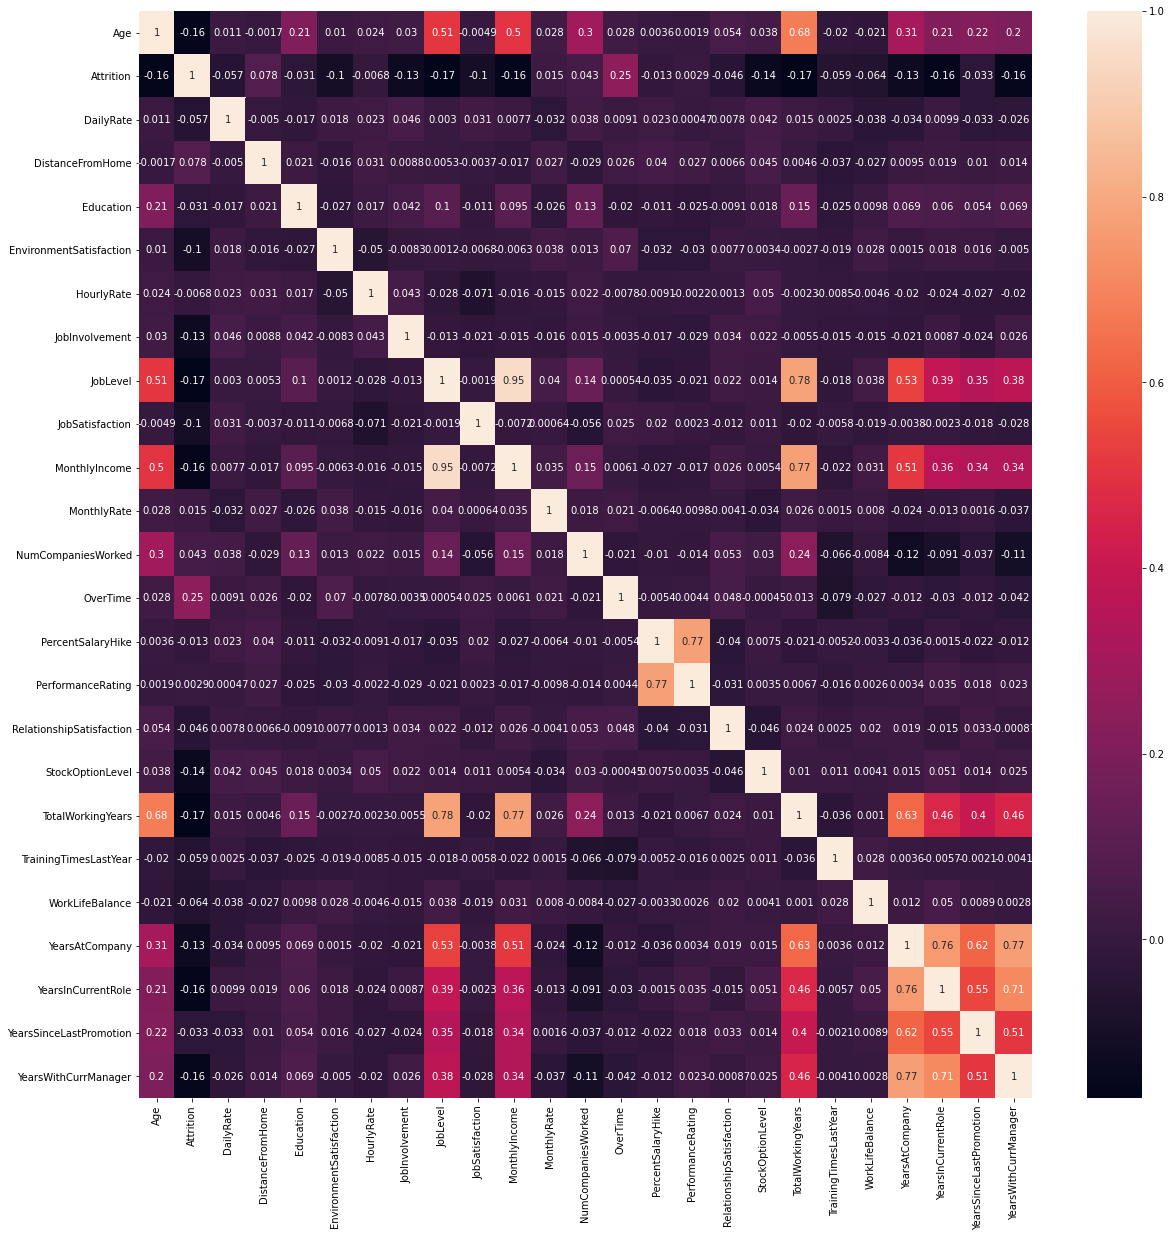

In [33]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True);

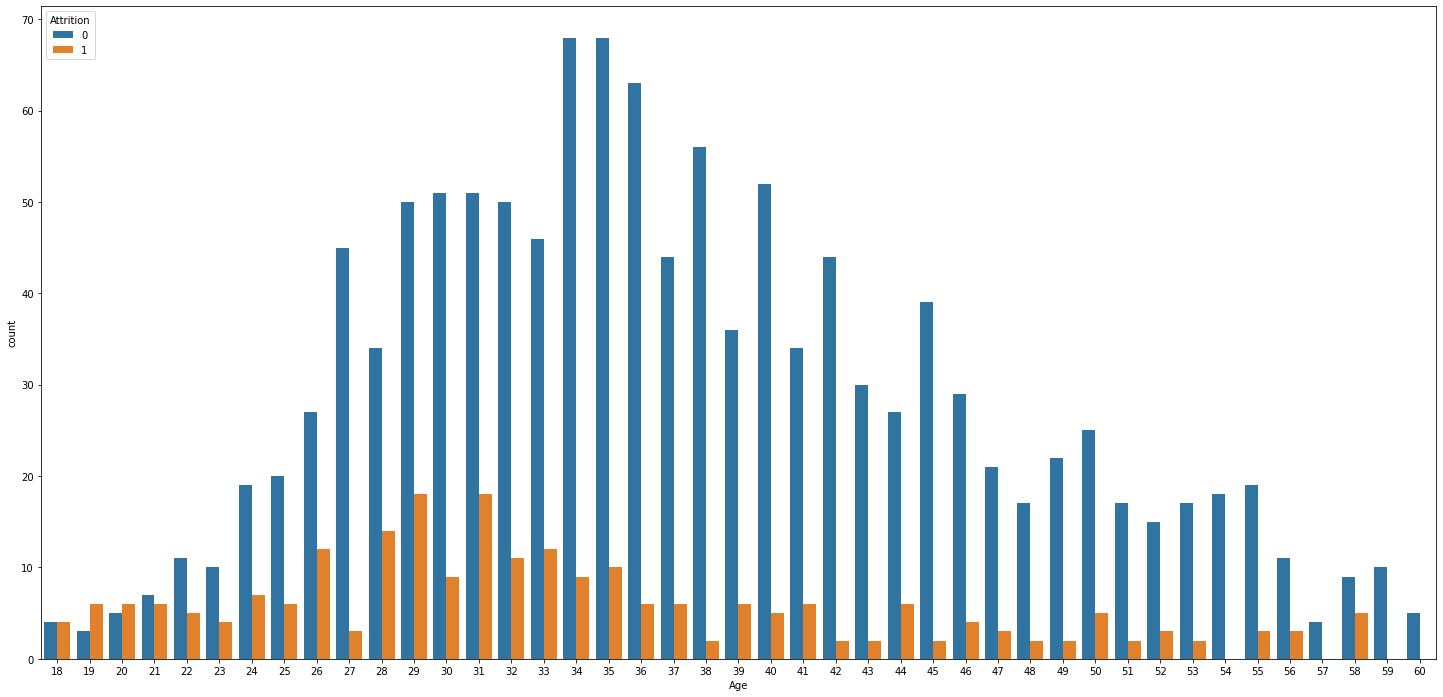

In [35]:
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition', data=data);

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

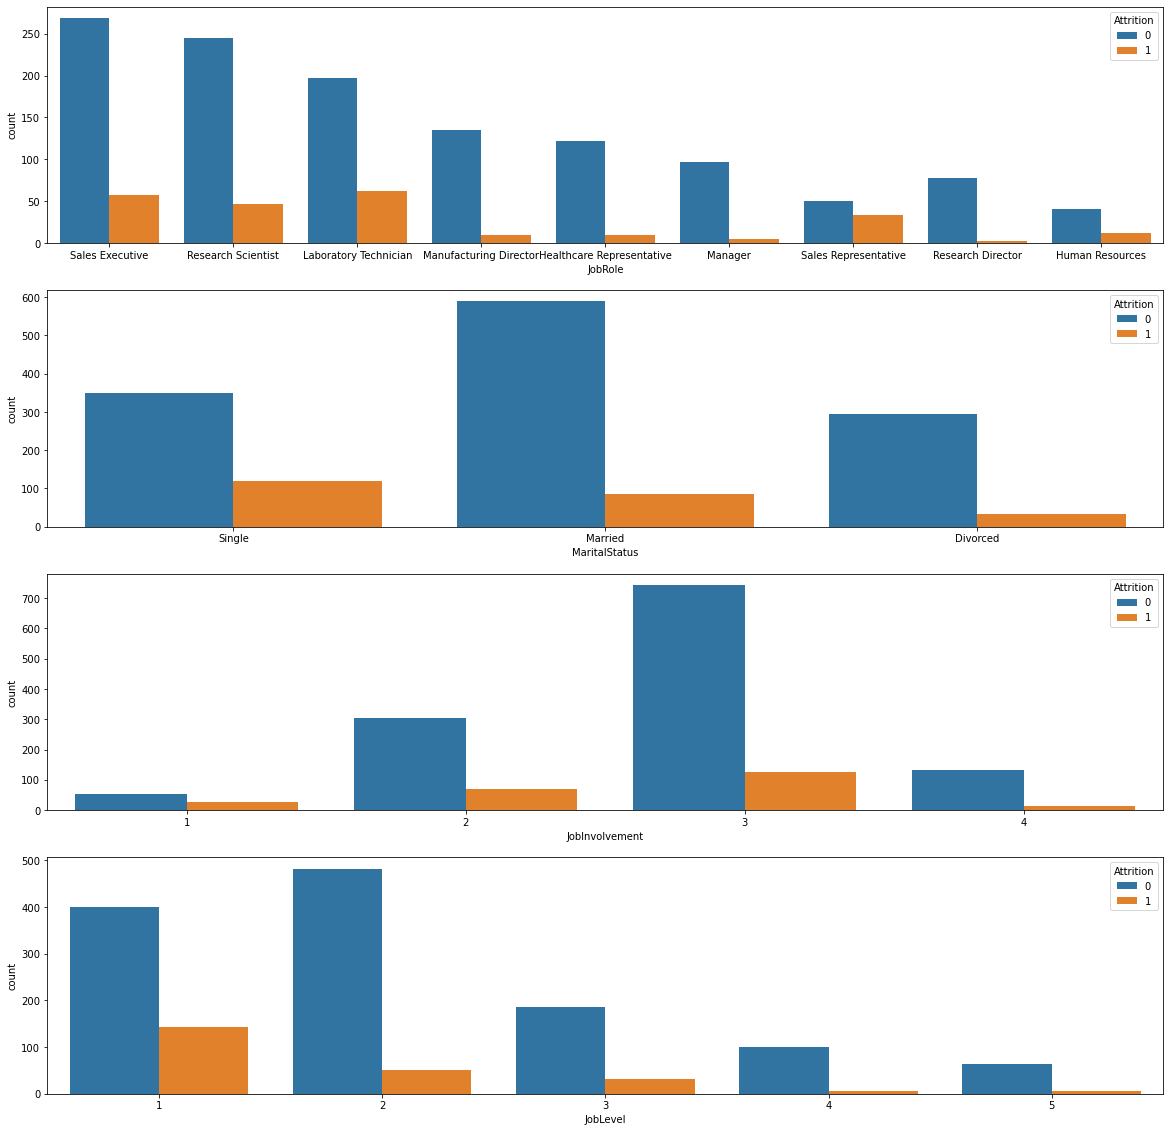

In [36]:
plt.figure(figsize=[20,20])

plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=data)

plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=data)

plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=data)

plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=data)

#### Observaciones:
- Los empleados solteros tienden a dejar la compañía
- Los empleados de Sales Representitives tienden a dejar la compañía.
- Las personas menos involucrada(Less Involved) tienden a dejar la compañía.
- Los de menos experiencia (low job level) tienden a dejar la compañía.

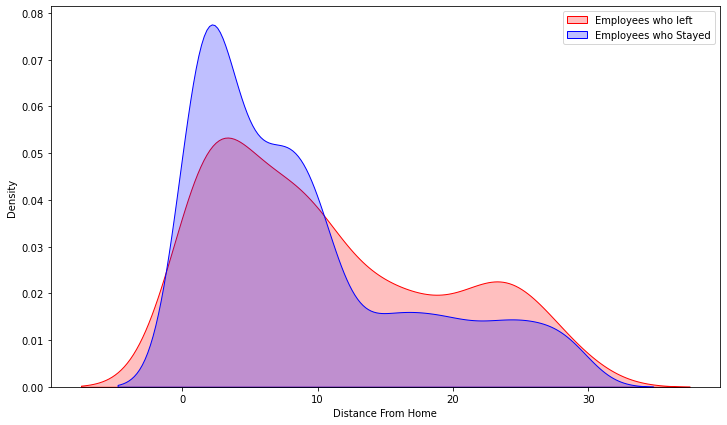

In [42]:
# KDE (Kernel Density Estimate) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad a diferentes valores en una variable continua.

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label ='Employees who left', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Employees who Stayed', shade=True, color='b')
plt.legend()
plt.xlabel('Distance From Home');


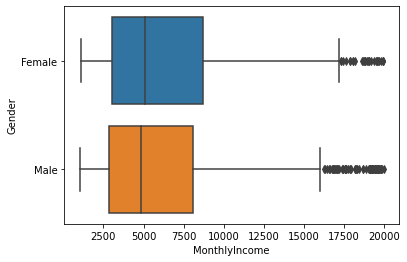

In [44]:
sns.boxplot(x='MonthlyIncome', y='Gender', data=data);

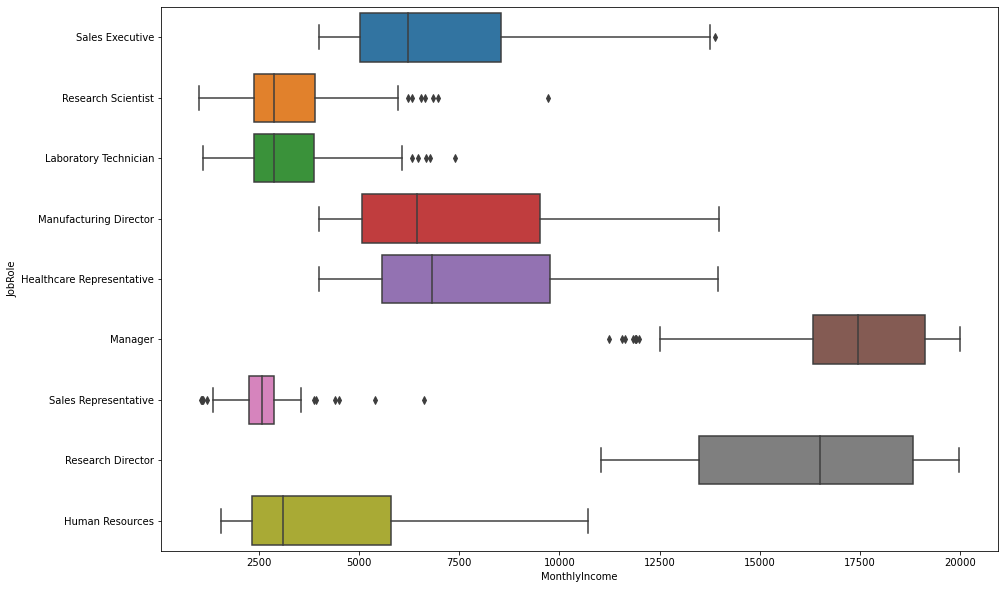

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=data);

## Paso 4: Creando testing y training dataset y limpieza de datos

In [50]:
# Seleccionaremos las variables de texto para convertirlo a integer
X_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [51]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [52]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [59]:
X_cat.shape

(1470, 26)

In [61]:
X_cat = pd.DataFrame(X_cat)

In [66]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [65]:
# Notemos que hemos elminado la columna target, 'Atrittion'
X_numerical = data[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [64]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [68]:
y = data['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Paso 5:  Entrenar y evaluar un clasificador utilizando la regresión logística

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=29)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [73]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 89.94565217391305 %


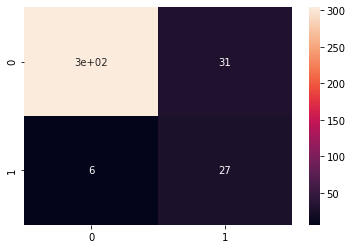

In [76]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       310
           1       0.82      0.47      0.59        58

    accuracy                           0.90       368
   macro avg       0.86      0.72      0.77       368
weighted avg       0.89      0.90      0.89       368



## Paso 6: Entrenamiento del modelo a través de Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [79]:
y_pred = model.predict(X_test)

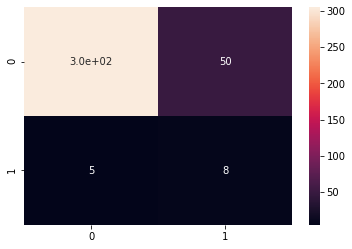

In [82]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       310
           1       0.62      0.14      0.23        58

    accuracy                           0.85       368
   macro avg       0.74      0.56      0.57       368
weighted avg       0.82      0.85      0.81       368



## Paso 7: Entrenamiento del modelo a través de Redes Neuronales

In [85]:
import tensorflow as tf

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [89]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.4815 - accuracy: 0.8348
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8579
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3296 - accuracy: 0.8599
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2967 - accuracy: 0.8866
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.8858
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8805
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.9121
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1958 - accuracy: 0.9212
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.9549
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9424
Epoch 11/

In [90]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [91]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [92]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

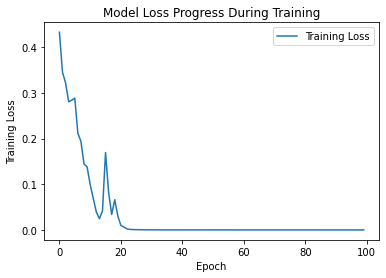

In [95]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

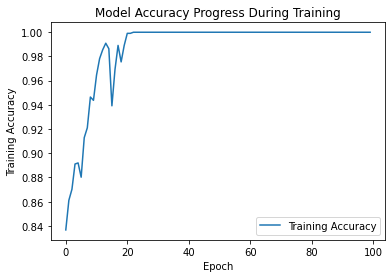

In [94]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy']);

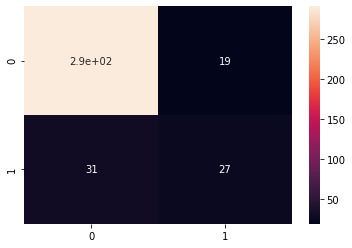

In [97]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       310
           1       0.59      0.47      0.52        58

    accuracy                           0.86       368
   macro avg       0.75      0.70      0.72       368
weighted avg       0.85      0.86      0.86       368

